<a href="https://colab.research.google.com/github/abdirimoof/ML/blob/main/CUSTOMER_CHURN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Imgur](https://i.imgur.com/h4PPC71.png)
#**18-modul. Amaliyot. Customer Churn**
# 18.6. Modul boʻyicha yakuniy amaliy vazifa

**Bu vazifa orqali data sayns jarayoni:**

✔️ maʼlumot tayyorlash;

  ✔️ model qurish;

  ✔️ baholash;

  ✔️ natijalarni tahlil qilish
  kabi koʻnikmalarga ega boʻlasiz.

#**Vazifa: bank mijozlarining noroziligini bashorat qilish**

**Vazifa tavsifi**

Sizga bank mijozlari haqida maʼlumotlar toʻplami berilgan. Maqsad – qaysi mijozlar bank xizmatlaridan voz kechishini (churn) oldindan bashorat qilish. Bank bu orqali oʻz mijozlarini ushlab qolish strategiyalarini yaxshilashi mumkin.

**Maʼlumotlar toʻplami**

Kaggle platformasidagi Churn Modelling maʼlumotlar toʻplamidan foydalanamiz. Ushbu toʻplamda 10 000 ta mijozning quyidagi maʼlumotlari mavjud:

- mijoz identifikatori (RowNumber, CustomerId, Surname);
- geografik joylashuvi (Geography);
- jinsi (Gender);
- yoshi (Age);
- kredit balli (CreditScore);
- yillik daromadi (EstimatedSalary);
- bankda qancha vaqtdan beri mijoz ekani (Tenure);
- qancha mahsulotdan foydalanishi (NumOfProducts);
- faoliyati (HasCrCard, IsActiveMember);
- balans (Balance);
- prognoz qilish holati, churn (Exited) – maqsadli oʻzgaruvchi.

**Topshiriqlar**

1. **Maʼlumotlarni tahlil qilish va tozalash:**
   - Maʼlumotlardagi boʻsh qiymatlar va anomaliyalarni aniqlang hamda tozalang.
   - Kategorik oʻzgaruvchilarni raqamli koʻrinishga oʻtkazing (masalan, one-hot encoding yordamida).

2. **Maʼlumotlarni boʻlish:**
   - Maʼlumotlarni training va test toʻplamlariga ajrating (masalan, 80% training, 20% test).

3. **Model qurish:**
   - Quyidagi algoritmlar yordamida modellarni yarating:
     - Logistic Regression
     - Support Vector Machine (SVM)
     - Decision Tree
     - Random Forest
     - XGBoost

4. **Modellarni baholash:**
   - Har bir model uchun quyidagi koʻrsatkichlarni hisoblang:
     - Aniqlik (Accuracy)
     - Toʻgʻrilik (Precision)
     - Recall
     - F1-score

5. **Natijalarni tahlil qilish:**
   - Olingan natijalarni solishtiring va qaysi model eng yaxshi ishlashini aniqlang.
   - Eng yaxshi model asosida bankka mijozlarni ushlab qolish boʻyicha tavsiyalar bering.
---

###*** ESLATMA**. *Ushbu amaliy vazifada siz oʻtmagan mavzulardan ham savollar va vazifalar boʻlishi mumkin! Bu savollarni mustaqil oʻrganishingiz kerak boʻladi. Bunday vazifalar mustaqil izlanish koʻnikmangizni oshirish uchun tayyorlandi!*

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import  confusion_matrix, classification_report, accuracy_score

In [73]:
import pandas as pd
import numpy as np
import sklearn

url = "https://raw.githubusercontent.com/alishermutalov/praktikum-datasets/refs/heads/praktikum/Churn_Modelling.xls"
df = pd.read_csv(url, index_col='RowNumber')
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


Maʼlumotlarni tahlil qilish va tozalash:

Maʼlumotlardagi boʻsh qiymatlar va anomaliyalarni aniqlang hamda tozalang.
Kategorik oʻzgaruvchilarni raqamli koʻrinishga oʻtkazing (masalan, one-hot encoding yordamida

In [74]:
# Javobni shu yerda yozing.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [75]:
df.isnull().sum()

,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0


In [76]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [77]:
df.shape

(10000, 13)

In [78]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [79]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [80]:
churn_rate = df['Exited'].value_counts() / len(df) * 100
churn_rate

,count
Exited,
0,79.63
1,20.37


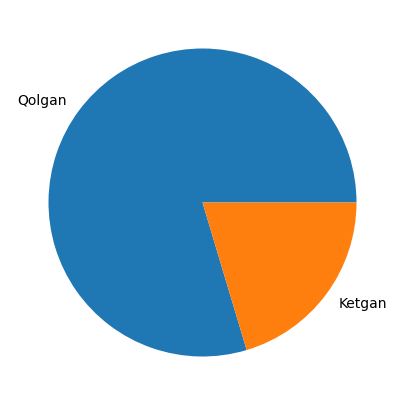

In [81]:
plt.figure(figsize=(5,5))
plt.pie(churn_rate, labels=['Qolgan','Ketgan'])
plt.show()

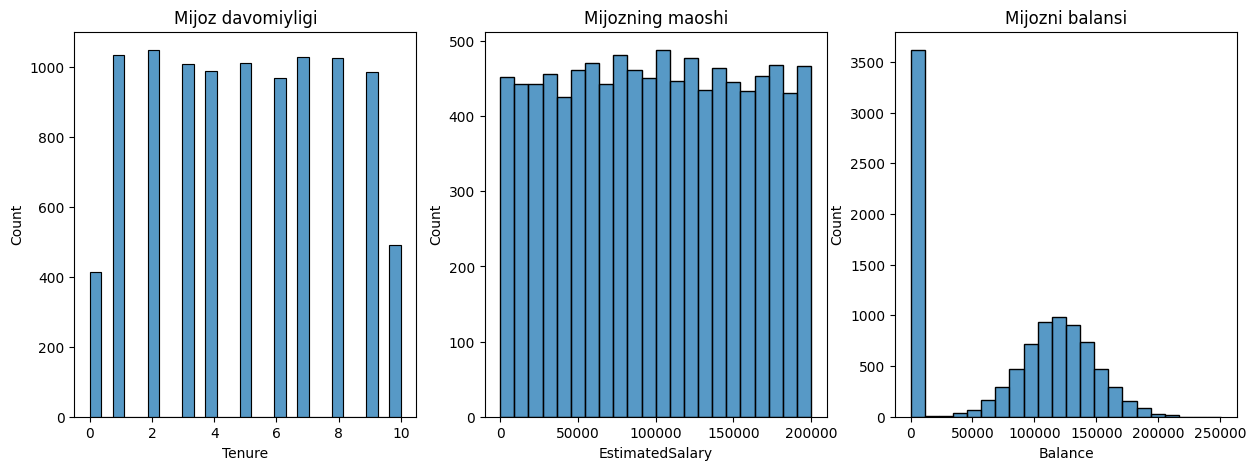

In [82]:
fig, axes = plt.subplots(1,3, figsize=(15,5))

# Tenure
sns.histplot(x="Tenure", data=df, ax=axes[0])
axes[0].set_title("Mijoz davomiyligi")

#OrderCount
sns.histplot(x="EstimatedSalary", data=df, ax=axes[1])
axes[1].set_title("Mijozning maoshi")

# Cashback
sns.histplot(x="Balance", data=df, ax=axes[2])
axes[2].set_title("Mijozni balansi")

plt.show()

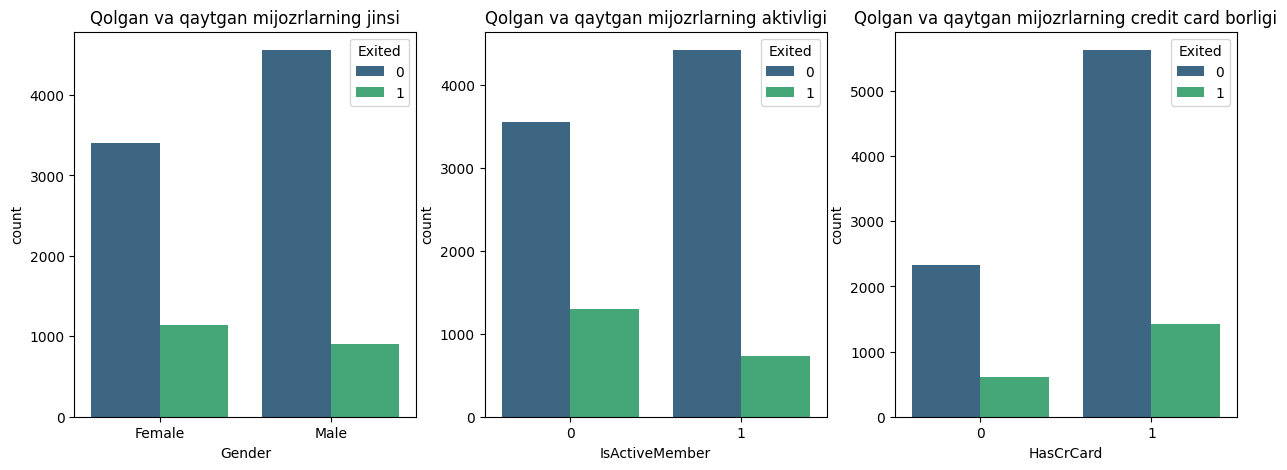

In [83]:
fig, axes = plt.subplots(1,3, figsize=(15,5))

sns.countplot(x='Gender', hue='Exited', palette='viridis', data=df, ax=axes[0])
axes[0].set_title("Qolgan va qaytgan mijozrlarning jinsi")

sns.countplot(x='IsActiveMember', hue='Exited', palette='viridis', data=df, ax=axes[1])
axes[1].set_title("Qolgan va qaytgan mijozrlarning aktivligi")

sns.countplot(x='HasCrCard', hue='Exited', palette='viridis', data=df, ax=axes[2])
axes[2].set_title("Qolgan va qaytgan mijozrlarning credit card borligi")

plt.show()

In [84]:
df = df.drop(['CustomerId', 'Surname'], axis=1)
df = pd.get_dummies(df, columns=['Gender', 'Geography'], dtype=int)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
RowNumber,,,,,,,,,,,,,,
1,619,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,0
2,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,0,1
3,502,42,8,159660.80,3,1,0,113931.57,1,1,0,1,0,0
4,699,39,1,0.00,2,0,0,93826.63,0,1,0,1,0,0
5,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,0,1


In [85]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
RowNumber,,,,,,,,,,,,,,
1,619,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,0
2,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,0,1
3,502,42,8,159660.80,3,1,0,113931.57,1,1,0,1,0,0
4,699,39,1,0.00,2,0,0,93826.63,0,1,0,1,0,0
5,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,0,1


In [86]:
df.corrwith(df['Exited'], numeric_only=True).abs().sort_values(ascending=False)

,0
Exited,1.000000
Age,0.285323
Geography_Germany,0.173488
IsActiveMember,0.156128
Balance,0.118533
Gender_Female,0.106512
Gender_Male,0.106512
Geography_France,0.104955
Geography_Spain,0.052667
NumOfProducts,0.047820


In [87]:
#df dagi mavjud bo'lmagan qiymatlar soni
print(f"Mavjud bo'lmagan qiymatlar soni: {df.isnull().sum().sum()}")
#mavjud bo'lmagan qatorlar soni
missing_rows = df[df.isnull().any(axis=1)].shape[0]
print(f"Mavjud bo'lmagan qatorlar soni: {missing_rows}")
#qatorlar nisbati
print(f"Mavjud bo'lmagan qatorlar %: {np.round(missing_rows/len(df)*100)}%")

Mavjud bo'lmagan qiymatlar soni: 0
Mavjud bo'lmagan qatorlar soni: 0
Mavjud bo'lmagan qatorlar %: 0.0%


In [88]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
RowNumber,,,,,,,,,,,,,,
1,619,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,0
2,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,0,1
3,502,42,8,159660.80,3,1,0,113931.57,1,1,0,1,0,0
4,699,39,1,0.00,2,0,0,93826.63,0,1,0,1,0,0
5,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,0,1


In [89]:
# Ma'lumotlarni training va test to'plamlariga ajratish
X = df.drop('Exited', axis=1)
y = df['Exited']


X_trains, X_tests, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shakli: {X_trains.shape}")
print(f"X_test shakli: {X_tests.shape}")
print(f"y_train shakli: {y_train.shape}")
print(f"y_test shakli: {y_test.shape}")

X_train shakli: (8000, 13)
X_test shakli: (2000, 13)
y_train shakli: (8000,)
y_test shakli: (2000,)


In [90]:
from IPython.display import display # 'display' funksiyasini qayta import qilish

scaler = StandardScaler()
X_train = scaler.fit_transform(X_trains)
X_test = scaler.transform(X_tests)

# Scaled ma'lumotlarni DataFrame'ga qaytarish (agar kerak bo'lsa)
X_train = pd.DataFrame(X_train, columns=X_trains.columns, index=X_trains.index)
X_test = pd.DataFrame(X_test, columns=X_tests.columns, index=X_tests.index)

Model qurish:

Quyidagi algoritmlar yordamida modellarni yarating:
Logistic Regression
Support Vector Machine (SVM)
Decision Tree
Random Forest
XGBoost

Logistic Regression

In [91]:
Lr_model = LogisticRegression()
Lr_model.fit(X_train, y_train)

LogisticRegression()

In [92]:
print("X_train ning dastlabki 5 qatori:")
display(X_train.head())
print("X_test ning dastlabki 5 qatori:")
display(X_test.head())

X_train ning dastlabki 5 qatori:


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
RowNumber,,,,,,,,,,,,,
9255,0.356500,-0.655786,0.345680,-1.218471,0.808436,0.649203,0.974817,1.367670,-0.913248,0.913248,1.001501,-0.579467,-0.576388
1562,-0.203898,0.294938,-0.348369,0.696838,0.808436,0.649203,0.974817,1.661254,-0.913248,0.913248,-0.998501,1.725723,-0.576388
1671,-0.961472,-1.416365,-0.695393,0.618629,-0.916688,0.649203,-1.025834,-0.252807,-0.913248,0.913248,-0.998501,-0.579467,1.734942
6088,-0.940717,-1.131148,1.386753,0.953212,-0.916688,0.649203,-1.025834,0.915393,1.094993,-1.094993,1.001501,-0.579467,-0.576388
6670,-1.397337,1.625953,1.386753,1.057449,-0.916688,-1.540351,-1.025834,-1.059600,-0.913248,0.913248,1.001501,-0.579467,-0.576388


X_test ning dastlabki 5 qatori:


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
RowNumber,,,,,,,,,,,,,
6253,-0.577496,-0.655786,-0.695393,0.329937,0.808436,-1.540351,-1.025834,-1.019605,-0.913248,0.913248,-0.998501,1.725723,-0.576388
4685,-0.297297,0.390011,-1.389442,-1.218471,0.808436,0.649203,0.974817,0.798883,-0.913248,0.913248,1.001501,-0.579467,-0.576388
1732,-0.525607,0.485083,-0.348369,-1.218471,0.808436,0.649203,-1.025834,-0.727980,1.094993,-1.094993,-0.998501,-0.579467,1.734942
4743,-1.511492,1.911170,1.039728,0.689272,0.808436,0.649203,0.974817,1.221387,-0.913248,0.913248,-0.998501,1.725723,-0.576388
4522,-0.951094,-1.131148,0.692704,0.782839,-0.916688,0.649203,0.974817,0.247560,1.094993,-1.094993,-0.998501,-0.579467,1.734942


In [93]:
y_predict_LR = Lr_model.predict(X_test)

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

Model aniqligi: 0.811


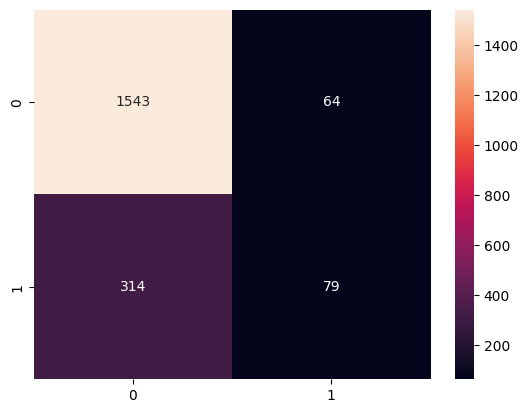

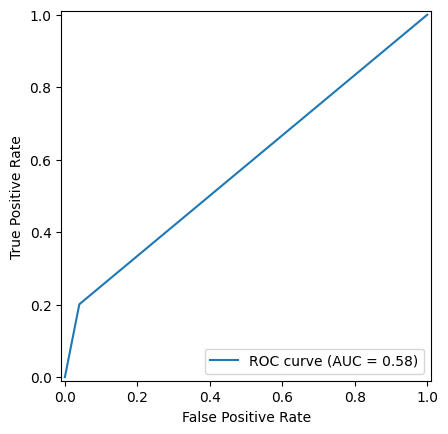

In [94]:
print(metrics.classification_report(y_test, y_predict_LR))
print("Model aniqligi:", metrics.accuracy_score(y_test,y_predict_LR))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_predict_LR)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_LR)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

Support Vektor Machine

In [95]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1607
           1       0.76      0.38      0.50       393

    accuracy                           0.85      2000
   macro avg       0.81      0.67      0.71      2000
weighted avg       0.84      0.85      0.83      2000

Model aniqligi: 0.8545


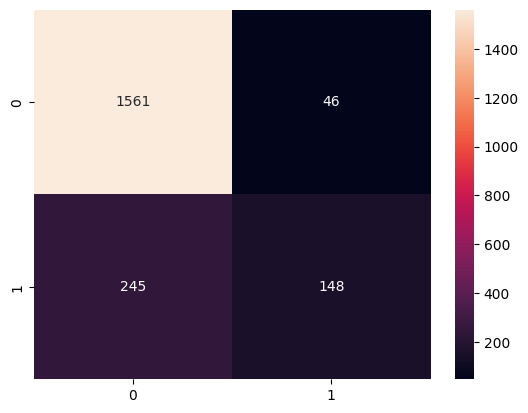

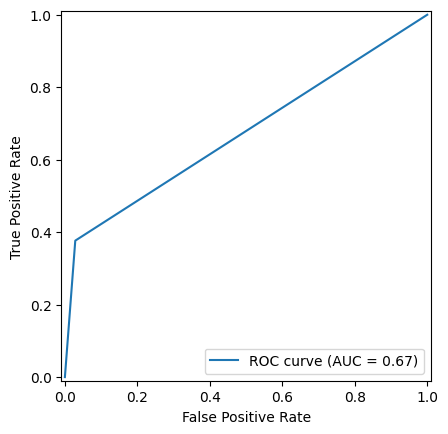

In [96]:
y_predict_svm = svm_model.predict(X_test)
print(metrics.classification_report(y_test, y_predict_svm))
print("Model aniqligi:", metrics.accuracy_score(y_test,y_predict_svm))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_predict_svm)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_svm)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

Decision Tree

In [97]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [98]:
y_predict_tree = tree_model.predict(X_test)

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1607
           1       0.45      0.50      0.47       393

    accuracy                           0.78      2000
   macro avg       0.66      0.67      0.67      2000
weighted avg       0.79      0.78      0.78      2000

Model aniqligi: 0.7805


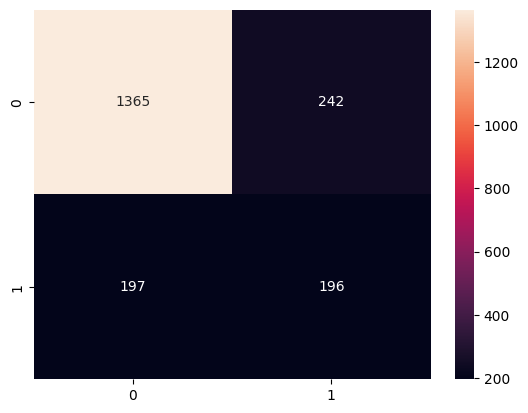

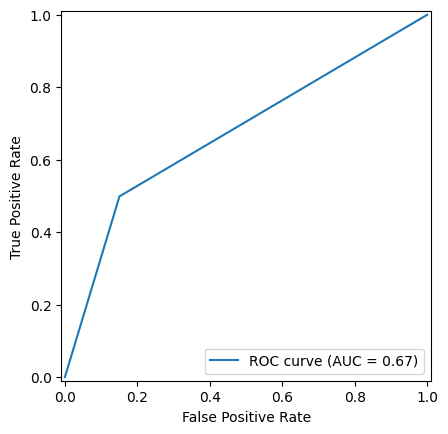

In [99]:
print(metrics.classification_report(y_test, y_predict_tree))
print("Model aniqligi:", metrics.accuracy_score(y_test,y_predict_tree))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_predict_tree)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_tree)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

Random Forest

              precision    recall  f1-score   support

           0       0.87      0.94      0.91      1607
           1       0.66      0.44      0.53       393

    accuracy                           0.85      2000
   macro avg       0.77      0.69      0.72      2000
weighted avg       0.83      0.85      0.83      2000

Model aniqligi: 0.846


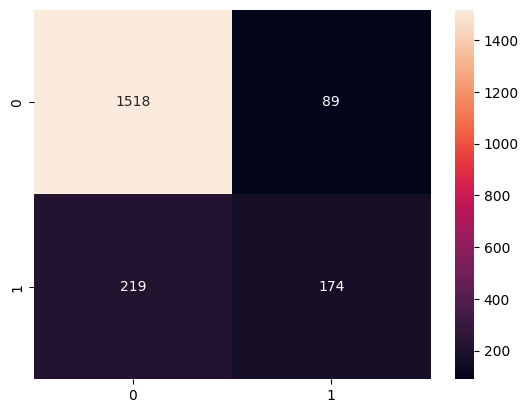

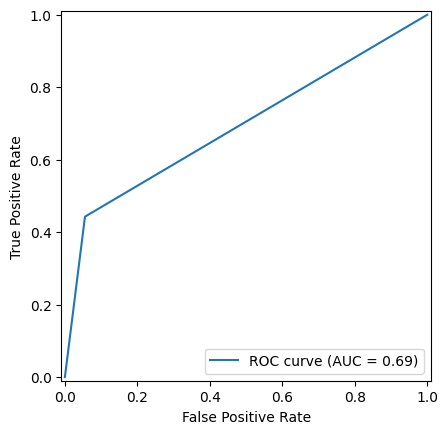

In [100]:
# Modelni yaratamiz (training)
RF_model = RandomForestClassifier(n_estimators=9)
RF_model.fit(X_train, y_train)

# Modelni baholaymiz
y_predict_forest = RF_model.predict(X_test)
print(classification_report(y_test, y_predict_forest))
print("Model aniqligi:", accuracy_score(y_test,y_predict_forest))

## confusion matrix
conf_mat = confusion_matrix(y_test, y_predict_forest)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_forest)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

XGBoost

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1607
           1       0.69      0.50      0.58       393

    accuracy                           0.86      2000
   macro avg       0.79      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000

Model aniqligi: 0.858


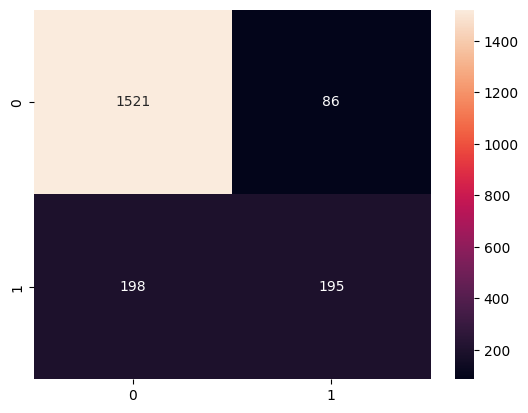

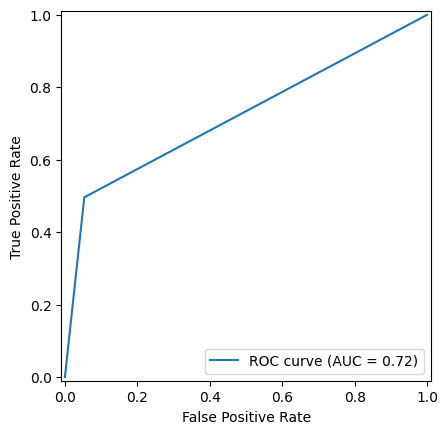

In [101]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Modelni baholaymiz
y_predict_XGB = xgb_model.predict(X_test)
print(classification_report(y_test, y_predict_XGB))
print("Model aniqligi:", accuracy_score(y_test,y_predict_XGB))

## confusion matrix
conf_mat = confusion_matrix(y_test, y_predict_XGB)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_XGB)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

Eng yaxshi ko`rsatkich XGBoost modelida bo`ldi

# Task
In order to generate recommendations, I will first identify the most important features that influence customer churn using the `xgb_model`. Then, I will provide practical recommendations based on these insights.

## Tavsiyalar tayyorlash

### Subtask:
Eng yaxshi model (XGBoost) natijalariga asoslanib, mijozlarning bankdan ketishiga ta'sir qiluvchi asosiy omillarni aniqlash va bankka mijozlarni ushlab qolish bo'yicha amaliy tavsiyalar berish.


**Reasoning**:
To identify the key factors influencing customer churn, I will first extract the feature importances from the trained XGBoost model and organize them into a Pandas DataFrame.



In [102]:
feature_importances = xgb_model.feature_importances_
feature_names = X_train.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("XGBoost Model Feature Importances (Sorted):")
print(importance_df)


XGBoost Model Feature Importances (Sorted):
              Feature  Importance
4       NumOfProducts    0.288658
6      IsActiveMember    0.194039
1                 Age    0.113240
11  Geography_Germany    0.099048
3             Balance    0.053883
8       Gender_Female    0.042302
10   Geography_France    0.041067
12    Geography_Spain    0.037478
0         CreditScore    0.034965
7     EstimatedSalary    0.033707
2              Tenure    0.033399
5           HasCrCard    0.028215
9         Gender_Male    0.000000


### Xususiyatlar muhimligini tahlil qilish va tavsiyalar berish

XGBoost modelining xususiyatlar muhimligi (Feature Importance) natijalariga ko'ra, mijozlarning bankdan ketishiga eng ko'p ta'sir qiluvchi omillar quyidagilardir:

1.  **NumOfProducts (Mahsulotlar soni):** Bu xususiyat eng yuqori muhimlikka ega. Ko'rinishidan, mijoz foydalanayotgan bank mahsulotlari soni uning ketishiga katta ta'sir ko'rsatadi. Juda oz yoki juda ko'p mahsulotlardan foydalanish norozilikka olib kelishi mumkin.
2.  **IsActiveMember (Faol a'zo):** Ikkinchi eng muhim omil mijozning bankdagi faolligi. Faol bo'lmagan mijozlarning ketish ehtimoli yuqoriroq bo'ladi.
3.  **Age (Yosh):** Mijozning yoshi ham muhim omil. Ma'lum yosh guruhidagi mijozlar (masalan, yoshi katta mijozlar) bankdan ketishga ko'proq moyil bo'lishi mumkin.
4.  **Geography_Germany (Yashash joyi - Germaniya):** Mijozning geografik joylashuvi ham muhim. Germaniyadagi mijozlarning bankdan ketish ehtimoli boshqa davlatlarga nisbatan yuqoriroq bo'lishi mumkin, bu hududga xos raqobat yoki iqtisodiy sharoitlar bilan bog'liq bo'lishi mumkin.
5.  **Balance (Balans):** Balans miqdori ham churnga ta'sir qiladi. Balansi nolga teng bo'lgan mijozlar (bankda pul saqlamaydiganlar) yoki juda yuqori balansga ega bo'lganlar o'zgarishni qidirishi mumkin.

### Bankka mijozlarni ushlab qolish bo'yicha amaliy tavsiyalar:

1.  **Mahsulot takliflarini optimallashtirish:**
    *   **Tavsiya:** Mijozlarning bank mahsulotlaridan foydalanish odatlarini chuqur tahlil qiling. Agar mijozlar faqat bitta mahsulotdan foydalanib ketayotgan bo'lsa, ularga qiziqarli qo'shimcha xizmatlar (masalan, kredit kartalar, investitsiya imkoniyatlari) taklif qiling. Agar mijozlar 3-4 ta mahsulotdan foydalanib ham ketayotgan bo'lsa, ularning yukini kamaytirish yoki paketli takliflar orqali qulaylik yaratish kerak. Har bir mahsulot turining mijozni ushlab qolishga qanday ta'sir qilishini o'rganing.
    *   **Maqsad:** Mijozlarning ehtiyojlariga mos keladigan, ammo ularni charchatmaydigan optimal mahsulot sonini topish va shunga mos takliflar yaratish.

2.  **Mijoz faolligini oshirish dasturlari:**
    *   **Tavsiya:** Bank xizmatlaridan kam foydalanadigan (IsActiveMember=0) mijozlar bilan faol muloqotni boshlang. Ularga bankning yangi xizmatlari, bonuslar, imtiyozlar haqida ma'lumot bering. Masalan, ularni faol bo'lishga undaydigan maxsus aksiyalar, keshbek dasturlari yoki chegirmalar taklif qiling. Faol bo'lmagan mijozlar bilan shaxsan bog'lanib, ularning noroziligi sabablarini aniqlashga harakat qiling.
    *   **Maqsad:** Mijozlarning bank bilan doimiy aloqada bo'lishini ta'minlash va ularning bank xizmatlaridan ko'proq foydalanishini rag'batlantirish.

3.  **Yosh va Geografik joylashuvga asoslangan marketing strategiyalari:**
    *   **Tavsiya:** Yoshga qarab ajratilgan mijoz guruhlari uchun maxsus takliflar ishlab chiqing. Masalan, yosh mijozlar uchun innovatsion raqamli xizmatlar, ipoteka yoki avtokreditlar bo'yicha maxsus shartlar; kattaroq mijozlar uchun esa pensiya jamg'armalari, sog'liq sug'urtasi yoki shaxsiy moliyaviy maslahat berish xizmatlarini taklif qilish mumkin.
    *   Germaniyadagi mijozlar uchun raqobatbardosh takliflar va xizmatlarni kuchaytiring. Mahalliy bozorning o'ziga xos xususiyatlarini o'rganib, ularning talab va ehtiyojlariga mos keladigan mahsulotlar (masalan, valyuta ayirboshlash, xalqaro pul o'tkazmalari uchun qulay shartlar) bilan chiqish kerak. Ushbu hududdagi raqobatchilarni tahlil qilib, bankning ustunliklarini ta'kidlang.
    *   **Maqsad:** Har bir yosh va geografik guruhning o'ziga xos ehtiyojlarini qondirish orqali mijozlarni bankda ushlab qolish.

In [103]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
